In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Data Setup

In [2]:
df = pd.read_csv("anime_clean_updated02.csv")

In [3]:
df2 = df.copy()

In [4]:
df2.drop(["MAL_ID", "Japanese name", "Episodes", "Aired", "Start Date", "End Date", "Status", "Premiered", "Producers", "Licensors", "Studios", "Source", "Duration (min)", "Ranked", "Popularity", "sypnopsis"], axis=1, inplace=True)

In [5]:
df2.drop(["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1"], axis=1, inplace=True)

In [6]:
df_name = df2.Name
df_eng_name = df2["English name"]
df_genres = df2.Genres
df2.drop(["Name", "English name", "Genres"], axis=1, inplace=True)
df2 = pd.get_dummies(df2)

In [7]:
df3 = df2.copy()
df3["Name"] = df_name
df3["English name"] = df_eng_name
df3["Genres"] = df_genres

In [8]:
first_column = df3.pop('Name')
df3.insert(0, 'Name', first_column)
second_column = df3.pop('English name')
df3.insert(1, 'English name', second_column)
third_column = df3.pop('Genres')
df3.insert(3, 'Genres', third_column)

In [9]:
df3.head()

,Name,English name,Score,Genres,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Type_ONA,Type_OVA,Type_Special,Type_TV,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Unknown
0,Cowboy Bebop,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,Trigun,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
3,Witch Hunter Robin,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
4,Bouken Ou Beet,Beet the Vandel Buster,6.98,"Adventure, Fantasy, Shounen, Supernatural",0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [10]:
# Output File (CSV)
output_data_file = "anime_rec.csv"

In [11]:
# Export to CSV
df3.to_csv(output_data_file,index=False)

# KNN Recommender

In [44]:
# to find anime if user knows the anime name
def get_recommended(df, anime_name, n_neighbors=10):
    
    df_sub = df.drop(["Name", "English name", "Genres"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    anime = df.loc[df["Name"] == anime_name]
    anime = anime.drop(["Name", "English name", "Genres"], axis=1)
    anime = anime.to_numpy()
    
    distances, indices = model_knn.kneighbors(anime, n_neighbors = n_neighbors)
    
    result = df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
#     result = result[["Name", "English name", "Score", "Genres"]]
    
    return result

<ipython-input-44-baefb67e59c5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Distance"] = distances.flatten()


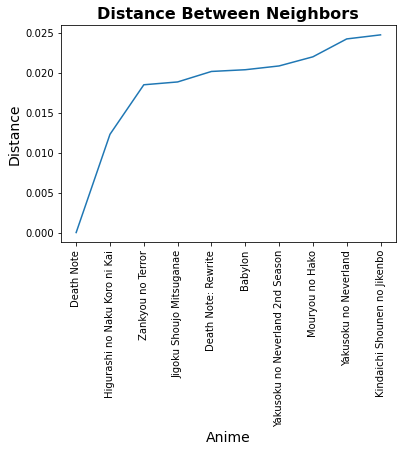

In [45]:
# Run this cell to get recommended anime
df_result = get_recommended(df3, "Death Note") # df3 is the reference table so no need to change; change second value

In [19]:
df_result.head()

,Name,English name,Score,Genres,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Type_OVA,Type_Special,Type_TV,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Unknown,Distance
1335,Death Note,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,1.110223e-16
1635,Higurashi no Naku Koro ni Kai,When They Cry:Kai,8.23,"Mystery, Psychological, Supernatural, Thriller",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,1.227892e-02
6679,Zankyou no Terror,Terror in Resonance,8.12,"Mystery, Psychological, Thriller",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,1.846860e-02
2836,Jigoku Shoujo Mitsuganae,Hell Girl:Three Vessels,7.65,"Mystery, Psychological, Supernatural",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,1.882233e-02
2470,Death Note: Rewrite,Death Note:Relight,7.71,"Mystery, Police, Psychological, Supernatural, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,2.013327e-02


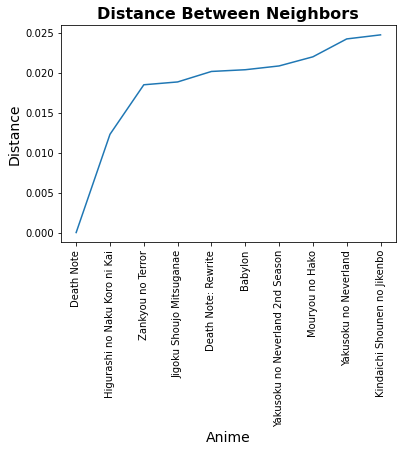

In [46]:
# plt.figure(figsize=(8,6))
# fig = plt.figure()
plt.plot(df_result["Name"], df_result["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("Anime", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
# plt.show()
plt.savefig('graph01.png', bbox_inches = "tight")

In [20]:
# to find anime if user knows nothing about anime and wants to use genre and review score
def get_recommended_genre(df, genre, score=0, n_neighbors=10):
    
    # explain metric hyper-parm in writeup
    df_sub = df.drop(["Name", "English name", "Genres"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    anime = df.loc[(df[genre] == 1) & (df.Score > score)].sample(1)
    anime = anime.drop(["Name", "English name", "Genres"], axis=1)
    anime = anime.to_numpy()
    
    distances, indices = model_knn.kneighbors(anime, n_neighbors = n_neighbors)
    
    result = df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
#     result = result[["Name", "English name", "Score", "Genres"]]
    
    return result

In [32]:
# Run this cell to get recommended anime
df_result2 = get_recommended_genre(df3, "Drama", 7) # df3 is the reference table so no need to change; change second and third values

<ipython-input-20-47bb536bfc5d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Distance"] = distances.flatten()


In [33]:
df_result2.head()

,Name,English name,Score,Genres,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Type_OVA,Type_Special,Type_TV,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Unknown,Distance
8939,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,Classroom of the Elite,7.85,"Slice of Life, Psychological, Drama, School",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0.000000
8750,Sanrio Danshi,Sanrio Boys,6.61,"Slice of Life, Drama, School",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0.008598
704,Oniisama e...,"Brother, Dear Brother",7.79,"Psychological, Drama, School, Shoujo, Shoujo Ai",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0.014894
10350,A3! Season Autumn & Winter,A3! Season Autumn & Winter,7.26,"Slice of Life, Drama",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0.015083
10381,Runway de Waratte,Smile Down the Runway,7.65,"Slice of Life, Drama, School, Shounen",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0.015167


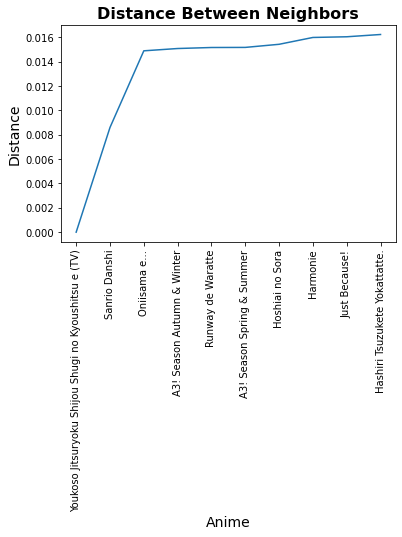

In [41]:
# plt.figure(figsize=(10,6))
plt.plot(df_result2["Name"], df_result2["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("Anime", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
plt.show()